# Exploratory Data Analysis (EDA)

### Import Libraries

In [1073]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from os import listdir

In [1074]:
basicdata = pd.read_csv('Data/gtzan-musicspeech-collection/datalables.txt')

In [1075]:
basicdata.head()

Filename  Music
0  acomic2.wav      0
1   acomic.wav      0
2  allison.wav      0
3     amal.wav      0
4  austria.wav      0

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f44d2d6be48>]],
      dtype=object)

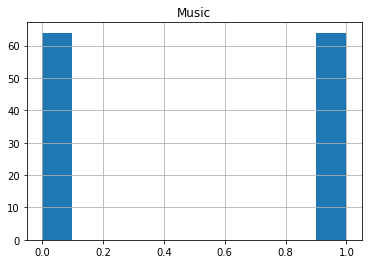

In [1076]:
basicdata.hist(column='Music')

In [1077]:
CorpusPath = 'Data/gtzan-musicspeech-collection/Corpus/'
Corpusfiles = listdir(CorpusPath)
fn =len(Corpusfiles)

In [1078]:
import random
selected = random.choice(Corpusfiles)

### Take a look at its Spectrogram

In [1079]:
import librosa
import librosa.display
import IPython.display as ipd

In [1080]:
x, Fs = librosa.load(CorpusPath+selected)
X = librosa.stft(x)
print('Playing the file: '+selected)
ipd.Audio(CorpusPath+selected) 

Playing the file: bagpipe.wav


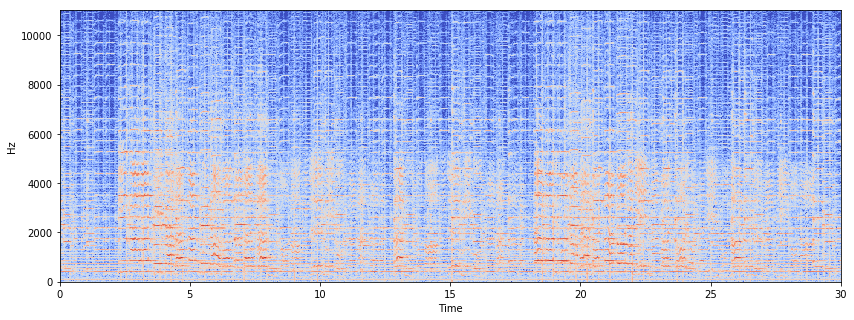

In [1081]:
x, Fs = librosa.load(CorpusPath+selected)
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=Fs, x_axis='time', y_axis='hz')

In [1082]:
from scipy.fftpack import fft
from scipy.io import wavfile 
import numpy as np
from scipy.signal import blackman
fs, data = wavfile.read(CorpusPath+selected)
w = blackman(len(data))
c = fft(data*w)
d = len(c)/2  
xf = np.linspace(0.0, 1.0/(2.0*(1/Fs)), len(data)//2)
Mag = abs(c[:int(d)])

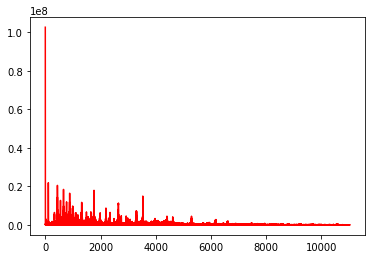

In [1083]:
plt.plot(xf, Mag,'r') 
plt.show()

In [1084]:
L, W = Xdb.shape

In [1085]:
Lf = np.sum(Xdb[:L//2,:])
Hf = np.sum(Xdb[L//2:,:])